In [14]:
from keras.datasets import cifar100
(x_train, y_train),(x_test, y_test) = cifar100.load_data()

In [15]:
from keras import models
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt 
from keras.utils import to_categorical
import numpy as np


In [16]:
class_name = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
              'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 
              'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
              'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 
              'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 
              'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 
              'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 
              'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 
              'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
              'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
              'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


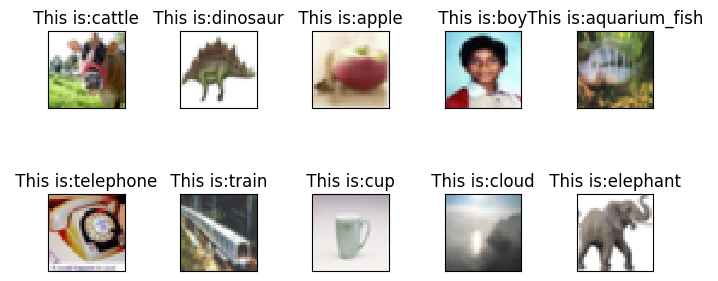

In [17]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],interpolation = 'none')
  so_2 = y_train[i][0]
  plt.title(' This is:{} '.format(class_name[so_2]))
  plt.xticks([])
  plt.yticks([])

In [18]:
#Xay dung mo hinh
model = Sequential()
#lop an thu 1
model.add(Dense(1024, activation ='relu', input_shape = (32*32*3,), name = 'layer1'))
#lop an thu 2
model.add(Dense(512,activation = 'relu', name = 'Layer2'))
#lop an thu 3
model.add(Dense(512,activation = 'relu', name = 'Layer3'))
#lop an thu 4
model.add(Dense(512,activation = 'relu', name = 'Layer4'))
#lop an thu 5
model.add(Dense(256,activation = 'relu', name = 'Layer5'))
#lop an thu 6
model.add(Dense(100, activation='softmax',name = 'Layer6'))

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1024)              3146752   
                                                                 
 Layer2 (Dense)              (None, 512)               524800    
                                                                 
 Layer3 (Dense)              (None, 512)               262656    
                                                                 
 Layer4 (Dense)              (None, 512)               262656    
                                                                 
 Layer5 (Dense)              (None, 256)               131328    
                                                                 
 Layer6 (Dense)              (None, 100)               25700     
                                                                 
Total params: 4,353,892
Trainable params: 4,353,892
No

In [19]:
#Tien xu ly du lieu dau vao
x_train = x_train.reshape((50000,32*32*3)) # chia hinh anh 2D thanh 1D de khop voi input network
x_train= x_train.astype('float32')/255   # vi anh la cac day mau tu 0 den 255 nen phai chuyen thanh kieu so thuc 

x_test = x_test.reshape((10000, 32*32*3))
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [20]:
#Compile va huan luyen mo hinh voi epochs = 30
import keras.metrics as metrics 
from keras.callbacks import EarlyStopping

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 50, batch_size = 128,verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/50
313/313 [==============================] - 33s 104ms/step - loss: 4.3750 - accuracy: 0.0354 - val_loss: 4.1676 - val_accuracy: 0.0555
Epoch 2/50
313/313 [==============================] - 31s 99ms/step - loss: 4.0704 - accuracy: 0.0696 - val_loss: 3.9611 - val_accuracy: 0.0829
Epoch 3/50
313/313 [==============================] - 31s 99ms/step - loss: 3.8930 - accuracy: 0.0991 - val_loss: 3.8780 - val_accuracy: 0.0997
Epoch 4/50
313/313 [==============================] - 33s 105ms/step - loss: 3.7383 - accuracy: 0.1247 - val_loss: 3.7539 - val_accuracy: 0.1248
Epoch 5/50
313/313 [==============================] - 30s 96ms/step - loss: 3.6205 - accuracy: 0.1439 - val_loss: 3.7405 - val_accuracy: 0.1303
Epoch 6/50
313/313 [==============================] - 30s 96ms/step - loss: 3.5235 - accuracy: 0.1613 - val_loss: 3.6994 - val_accuracy: 0.1457
Epoch 7/50
313/313 [==============================] - 31s 98ms/step - loss: 3.4346 - accuracy: 0.1771 - val_loss: 3.5009 - val_accurac

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Do chinh xac tren tap kiem tra: ',test_acc)
print('Ham mat mat tren tap kiem tra: ', test_loss)

313/313 [==============================] - 5s 15ms/step - loss: 6.7519 - accuracy: 0.1888
Do chinh xac tren tap kiem tra:  0.18880000710487366
Ham mat mat tren tap kiem tra:  6.751928329467773


In [25]:
print('X_train: ', x_train.shape)
print('X_test: ', x_test.shape)
print('Y_train: ',y_train.shape)
print('Y_test: ',y_test.shape)


X_train:  (50000, 3072)
X_test:  (10000, 3072)
Y_train:  (50000, 100)
Y_test:  (10000, 100)


1/1 [==============================] - 0s 78ms/step
This is rabbit


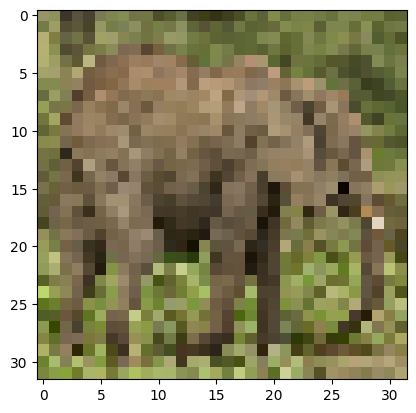

In [30]:
#Du doan tren hinh anh moi
from keras.utils import load_img
from keras.utils.image_utils import img_to_array 
import numpy as np

url = 'cifar_100_elephant_2.png'
img = load_img(url)
#plt.imshow(img)

img = load_img(url,target_size = (32,32,3))
plt.imshow(img)
img = img_to_array(img)
#img = img[:,:,0]
img = img.reshape((1,32*32*3))
img = img.astype('float32')/255
so = int(np.argmax(model.predict(img),axis =1))
print("This is",class_name[so])